In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -l '/content/drive/My Drive//Colab Notebooks/datasets/Online_Retail.zip'

-rw------- 1 root root 22824989 Mar 11 00:24 '/content/drive/My Drive//Colab Notebooks/datasets/Online_Retail.zip'


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Online_Retail.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Online_Retail.zip
replace Online_Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls -l

total 23168
drwx------ 5 root root     4096 Mar 11 04:04 drive
-rw-r--r-- 1 root root 23715344 Mar  7 16:08 Online_Retail.xlsx
drwxr-xr-x 1 root root     4096 Mar  5 14:37 sample_data


In [ ]:
%%time
DF= pd.read_excel('Online_Retail.xlsx')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
CPU times: user 40.7 s, sys: 467 ms, total: 41.2 s
Wall time: 41.3 s


In [ ]:
DF.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 결측치 제거

In [ ]:
DF= DF[DF['Quantity'] > 0]
DF = DF[DF['UnitPrice'] > 0]
DF = DF[DF['CustomerID'].notnull()]
DF.shape

(397884, 8)

In [ ]:
DF.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
DF['Country'].value_counts()[:10]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: Country, dtype: int64

In [ ]:
DF=DF[DF['Country'] == 'United Kingdom']
DF.shape

(354321, 8)

In [ ]:
DF.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## 구매/ 구매취소 테이블 분리- 구매취소가 없었음..

In [ ]:
import re
invoice_no = list(DF.InvoiceNo)
p = re.compile('^C')
cancel = []
buy = []
for i in invoice_no:
  if i == p.match(str(i)):
    cancel.append(i)
  else:
    buy.append(i)

In [ ]:
cancel

[]

In [ ]:
len(buy)

354321

In [ ]:
DF.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


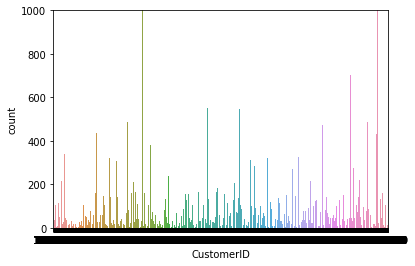

In [ ]:
sns.countplot(DF.CustomerID)
plt.ylim(0,1000)
plt.show()

In [ ]:
price = DF['Quantity'] * DF['UnitPrice']
price.head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
dtype: float64

In [ ]:
DF['price']=price
DF.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
VIP = DF['CustomerID'].value_counts()
VIP

17841.0    7847
14096.0    5111
12748.0    4595
14606.0    2700
15311.0    2379
           ... 
14705.0       1
17923.0       1
15802.0       1
13747.0       1
15316.0       1
Name: CustomerID, Length: 3920, dtype: int64

In [ ]:
len(VIP)

3920

In [ ]:
type(VIP)

pandas.core.series.Series

In [ ]:
SUM = DF.groupby('CustomerID')['price'].sum()


In [ ]:
DF[SUM]=SUM


In [ ]:
DF.head(3)

In [ ]:
DF.StockCode.value_counts()

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(x=DF.CustomerID, y=DF.Quantity)
plt.ylim(0,6000)
plt.show()

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(DF['Quantity'], color = 'r')
sns.distplot(VIP, color='g')
sns.distplot(DF['price'], color='b')
plt.show()

In [ ]:
plt.scatter(x=VIP, y=DF['price'])
plt.show()